# Fixed Point

### Definition

A point is said to be a **fixed point** under a function $f$ if and only if it is *invariant* under $f$, that is 

$$f(x) = x.$$

As a collorary, successive iterations of $f$ on a fixed point $x$ essentially has no effect on the outcome:

$$f \cdots f(f(f(x))) = f^n(x) = x.$$

### Clarifications

Not all functions have fixed points. 

*Example.* There can never exist a fixed point $x$ for $f(x) = x + 1$ since it is always shifted by $1$.

The [fixed-point theorem](https://en.wikipedia.org/wiki/Fixed-point_theorem) guarantees the existence of at least one fixed point for certain $f$. There are variants of this theorem which deals with specific functions.

*Example.* The [Brouwer fixed-point theorem](https://en.wikipedia.org/wiki/Brouwer_fixed-point_theorem) deals with $f$ which are compact and convex.

### Types

There are two types of fixed points which have to do with convergence starting from an $x_0$ close to $x$. Note we defined $x_0 = x + \epsilon$.
    
1. **stable** (attractive): a fixed point $x$ is said to be stable if for $\epsilon \geq 0$, $$\lim_{n \rightarrow \infty} f^n(x_0) = x.$$
      
2. **unstable**: a fixed point $x$ is said to be unstable if the preceding limit only holds for $\epsilon = 0$, that is $$\lim_{n \rightarrow \infty} f^n(x_0) = x$$ if and only if $x_0 = x$.

### Main Example 

*Example.* What are the unstable and stable fixed points of the function $f(x) = 1 + \frac{1}{x}$?

*Approach.* 

1. Using the definition of fixed point, we first set $f(x) = x$, $$x = 1 + \frac{1}{x}.$$

2. Manipulating algebraically, we obtain the polynomial $x^2 = x + 1$, or $$x^2 - x - 1 = 0.$$ (This is the minimal polynomial corresponding to the golden ratio.(

3. Solving the polynomial, we find $$x = \dfrac{1 + \sqrt{5}}{2}, \dfrac{1 - \sqrt{5}}{2}.$$


However, this doesn't tell us which $x$ is stable and unstable. Let's code up a test.

In [45]:
"""
Applies func iteratively and stores result.
"""
def iter_func(func, fixed_point, epsilon, iterations):
    # Seed value.
    x = func(fixed_point + epsilon)
    # Tabulates the results.
    results = []
    # Appends starting point and seed.
    results.append(fixed_point + epsilon); results.append(x)
    
    for i in range(iterations):
        x = func(x)
        results.append(x)
        
    return results


"""
Our example function.
"""
def example_func(x):
    return 1 + (1 / x)


"""
Definition of phi.
"""
x_0 = (1 + 5**(1 / 2)) / 2
x_1 = (1 - 5**(1 / 2)) / 2

In [46]:
iterations = 10
ep = 0.5

x_0_with_zero_ep = iter_func(example_func, x_0,  0, iterations)
x_0_with_some_ep = iter_func(example_func, x_0, ep, iterations)

x_1_with_zero_ep = iter_func(example_func, x_1,  0, iterations)
x_1_with_some_ep = iter_func(example_func, x_1, ep, iterations)

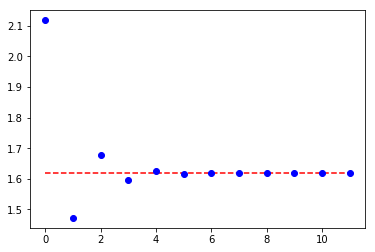

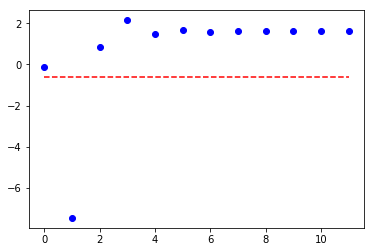

In [47]:
import matplotlib.pyplot as plt

y = list(range(iterations + 2))

plt.plot(y, x_0_with_zero_ep, 'r--', y, x_0_with_some_ep, 'bo')
plt.show()

plt.plot(y, x_1_with_zero_ep, 'r--', y, x_1_with_some_ep, 'bo')
plt.show()

We can therefore declare that $x = \dfrac{1 + \sqrt{5}}{2}$ is a stable point and $x = \dfrac{1 - \sqrt{5}}{2}$ is an unstable point of $f(x) = 1 + \dfrac{1}{x}$. 

### Applications

1. Zero Sum Games: Finding the Nash equilibrium of a zero sum game is equivalent to finding the fixed point of the game matrix.

2. Markov Chains: Finding the stationary distribution is equivalent to finding the fixed point of the transition matrix.

Note that both of these examples imply that the fixed point isn't necessarily a scalar -- it can be a vector, a matrix, or a higher dimension array as well!